## Overview<br>
This dataset contains information about e-commerce products and their characteristics, designed for detecting counterfeit products in online marketplaces. The dataset includes various features related to product listings, seller behavior, and marketplace metrics that can be used to identify potentially fraudulent or counterfeit items.<br>
Dataset Information<br>
Total Records: 5,000 products<br>
Total Features: 27 columns<br>
Target Variable: fraud_indicator (indicates if a product is counterfeit)<br>
File Format: CSV<br>
Dataset Link: https://drive.google.com/drive/folders/1ZR6RqDeWEEjY3IyyFRsqJpqqO24Yhlrc?usp=sharing<br>
# Task 1: Exploratory Data Analysis (EDA)
Objective <br>
Conduct a comprehensive exploratory data analysis to understand the dataset structure, identify patterns, and extract meaningful insights about counterfeit product characteristics.<br>
# 1.1 Data Understanding and Quality Assessment
Data Overview: Provide summary statistics, data types, and dataset structure<br>
Missing Value Analysis: Identify, quantify, and analyze patterns in missing data<br>
Data Quality Issues: Detect and document outliers, inconsistencies, and anomalies<br>
Data Distribution Analysis: Examine distributions of key numerical and categorical variables<br>


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('counterfeit_products_renamed.csv')
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


In [6]:
df.tail()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
4995,134b692c,seller_7351,Pharmaceuticals,HealthCare Plus,55.29,4.3,4744,3,589,3,...,FR,995,38,3,3,16,True,False,NaN,False
4996,52543a23,seller_3051,Luxury Goods,LuxuryBrand,NaN,2.4,44,2,179,37,...,FR,505,35,19,3,21,True,False,False,True
4997,bfae7e37,seller_8274,Luxury Goods,EliteDesign,293.09,4.6,7255,8,808,1,...,NaN,4289,344,51,3,18,False,False,NaN,False
4998,bc618758,seller_5933,Luxury Goods,EliteDesign,NaN,3.0,14,1,62,37,...,US,2981,155,79,1,0,False,False,NaN,True
4999,f7efbc83,seller_5295,Automotive Parts,AutoParts Pro,401.46,4.3,5721,5,774,10,...,NaN,2544,130,76,3,10,False,True,False,False


In [3]:
df.columns

Index(['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'cost_usd',
       'vendor_score', 'feedback_count', 'image_qty', 'desc_chars',
       'delivery_period', 'typo_count', 'site_age', 'contact_valid',
       'return_clarity', 'payment_options', 'post_timestamp', 'vendor_nation',
       'dispatch_loc', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals',
       'guarantee_term', 'wholesale_avail', 'payment_anomaly',
       'geo_inconsistency', 'fraud_indicator'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [15]:
df.dtypes

item_ref              object
vendor_code           object
product_type          object
manufacturer          object
cost_usd             float64
vendor_score         float64
feedback_count         int64
image_qty              int64
desc_chars             int64
delivery_period        int64
typo_count             int64
site_age             float64
contact_valid           bool
return_clarity          bool
payment_options        int64
post_timestamp        object
vendor_nation         object
dispatch_loc          object
page_hits              int64
sales_vol              int64
saved_items            int64
trust_seals            int64
guarantee_term         int64
wholesale_avail         bool
payment_anomaly         bool
geo_inconsistency     object
fraud_indicator         bool
dtype: object

In [7]:
df.describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


In [8]:
df.shape

(5000, 27)

In [9]:
df.isnull().sum()

item_ref                0
vendor_code             0
product_type            0
manufacturer            0
cost_usd             1348
vendor_score            0
feedback_count          0
image_qty               0
desc_chars              0
delivery_period         0
typo_count              0
site_age                0
contact_valid           0
return_clarity          0
payment_options         0
post_timestamp          0
vendor_nation           0
dispatch_loc          747
page_hits               0
sales_vol               0
saved_items             0
trust_seals             0
guarantee_term          0
wholesale_avail         0
payment_anomaly         0
geo_inconsistency    1249
fraud_indicator         0
dtype: int64

In [20]:
missing_features = [features for features in df.columns if df[features].isnull().sum()>0]

In [21]:
for feature in missing_features:
    print(f"Feature: {feature}, Missing Values: {df[feature].isnull().sum()}")

Feature: cost_usd, Missing Values: 1348
Feature: dispatch_loc, Missing Values: 747
Feature: geo_inconsistency, Missing Values: 1249


## Observation 1
cost_usd has 1348 null elements <br>
dispact_loc has 747 null elements <br>
geo_inconsistency has 1249 null elements <br>

In [18]:
df.isnull().sum().sum()

np.int64(3344)

In [25]:
feature_names = df.columns.tolist()
print(feature_names)

['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'cost_usd', 'vendor_score', 'feedback_count', 'image_qty', 'desc_chars', 'delivery_period', 'typo_count', 'site_age', 'contact_valid', 'return_clarity', 'payment_options', 'post_timestamp', 'vendor_nation', 'dispatch_loc', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals', 'guarantee_term', 'wholesale_avail', 'payment_anomaly', 'geo_inconsistency', 'fraud_indicator']


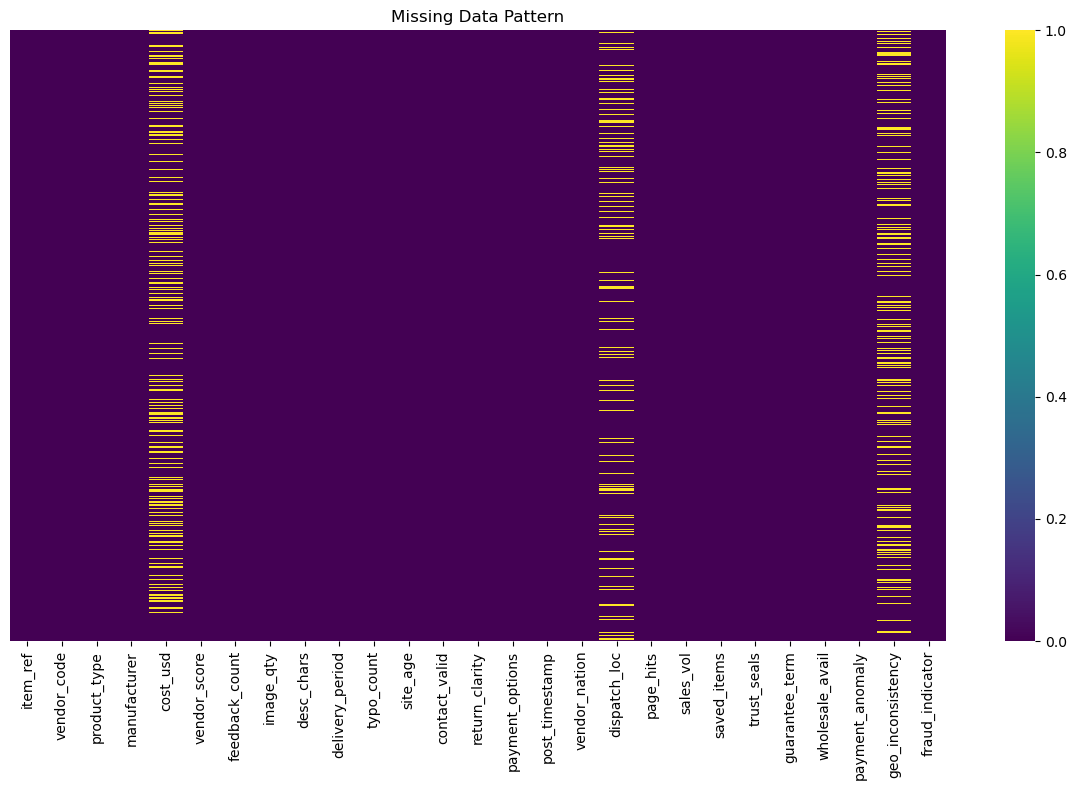

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')
plt.tight_layout()
plt.show()